# Fraud Detection System

In [123]:
#import necessary models and libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

import collections

%matplotlib inline
import matplotlib.pyplot as plt

import data from kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [124]:
#read the data and save it in df
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# check whether any of the values are missing
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# return the series containing counts of unique values
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Split data into normal and fraud
0 - # of normal transactions
1 - # of fraud transactions

In [6]:
# seperate data for the further analysis
normal = df[df.Class == 0]
fraud = df[df.Class == 1]

In [7]:
# need to find out the matrices shapes
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


Need to view the statistics of both of the datasets

In [8]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
# compare the values for both datasets
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Under Sampling

The undersampling is conducted to:
make the set balanced
avoid overfitting

In [11]:
# creating less samples to match normal dataset
normal_under_sample = normal.sample(n=492) 

In [12]:
# build a new dataframe
normal_df = pd.concat([normal_under_sample, fraud], axis = 0)

In [13]:
normal_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
95739,65442.0,-5.015087,3.041594,0.508471,2.479145,-1.703519,1.673319,-1.481565,1.522606,0.760693,...,0.163183,0.150103,0.057565,-0.322835,0.005904,0.135251,-1.666894,0.723122,17.24,0
118015,74915.0,1.345707,-0.575480,0.603205,-0.695274,-1.041123,-0.501084,-0.745245,-0.023503,-0.656310,...,0.135347,0.317288,0.044331,0.088236,0.281741,-0.253498,0.030028,0.018793,16.00,0
212093,138709.0,2.148813,-0.074116,-2.573260,-0.337782,1.000894,-0.596484,0.502468,-0.201749,0.256163,...,0.126097,0.365870,-0.086476,-0.105702,0.457918,0.247134,-0.104046,-0.094673,1.89,0
116653,74374.0,-0.341830,1.184869,1.309382,0.055606,0.093200,-0.964935,0.766500,-0.116748,-0.510403,...,-0.254564,-0.626968,-0.022126,0.354953,-0.134689,0.069284,0.250350,0.099980,3.99,0
195058,130875.0,1.968937,-0.557725,0.030995,0.171990,-0.893319,-0.015563,-1.010437,0.196478,1.160642,...,0.058546,0.307938,0.276465,-0.311382,-0.585825,0.482921,-0.015300,-0.052749,1.00,0


In [14]:
# need to check that we have the same counts for both datasets
normal_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [15]:
# define X and Y
X = normal_df.drop(columns = 'Class', axis = 1)
Y = normal_df["Class"]

In [16]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
95739    65442.0 -5.015087  3.041594  0.508471  2.479145 -1.703519  1.673319   
118015   74915.0  1.345707 -0.575480  0.603205 -0.695274 -1.041123 -0.501084   
212093  138709.0  2.148813 -0.074116 -2.573260 -0.337782  1.000894 -0.596484   
116653   74374.0 -0.341830  1.184869  1.309382  0.055606  0.093200 -0.964935   
195058  130875.0  1.968937 -0.557725  0.030995  0.171990 -0.893319 -0.015563   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [17]:
# splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state = 2)

In [18]:
# initializing the values
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Analysis
using ML algorithms and models

In [19]:
# create dict - classifiers for 4 models
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [20]:
# undersampling
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Classifiers:  LogisticRegression has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier has a training score of 66.0 % accuracy score
Classifiers:  SVC has a training score of 56.00000000000001 % accuracy score
Classifiers:  DecisionTreeClassifier has a training score of 91.0 % accuracy score


Investigating Hyperparameters using Grid Search

In [28]:
# Hyperparameters for Logistic Regression
lr_hyp = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_lr = GridSearchCV(LogisticRegression(max_iter = 200), lr_hyp,)
grid_lr.fit(X_train, y_train)

# best estimator for the parameters
lr_be = grid_lr.best_estimator_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lb

In [22]:
# Hyperparameters for KNeighbors
kn_hyp = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_kn = GridSearchCV(KNeighborsClassifier(), kn_hyp)
grid_kn.fit(X_train, y_train)

# best estimator for the parameters
kn_be = grid_kn.best_estimator_

In [24]:
# Hyperparameters for DecisionTree Classifier
tree_hp = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_hp)
grid_tree.fit(X_train, y_train)

# best estimator for the parameters
tree_be = grid_tree.best_estimator_

In [41]:
# Calculating and outputing the cross-validation scores of each model
log_reg_score = cross_val_score(lr_be, X_train, y_train, cv=5)
print('Logistic Regression Cross-Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(kn_be, X_train, y_train, cv=5)
print('Knears Neighbors Cross-Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_be, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross-Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross-Validation Score:  93.9%
Knears Neighbors Cross-Validation Score 65.81%
DecisionTree Classifier Cross-Validation Score 92.63%


This shows that the best ML classifier or model for the Fraud Detection system is Logistic Regression and this can be validated through the plot

In [119]:
# build a plot for the Logistic Regression using learnign_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt

def plot_learning_curve(classifier1, X, y, ylim=None, cv=1,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ax1 = plt.subplots( 1,1, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # Logic Regression Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(
        classifier1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#00FF00",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#000000",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    return plt

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

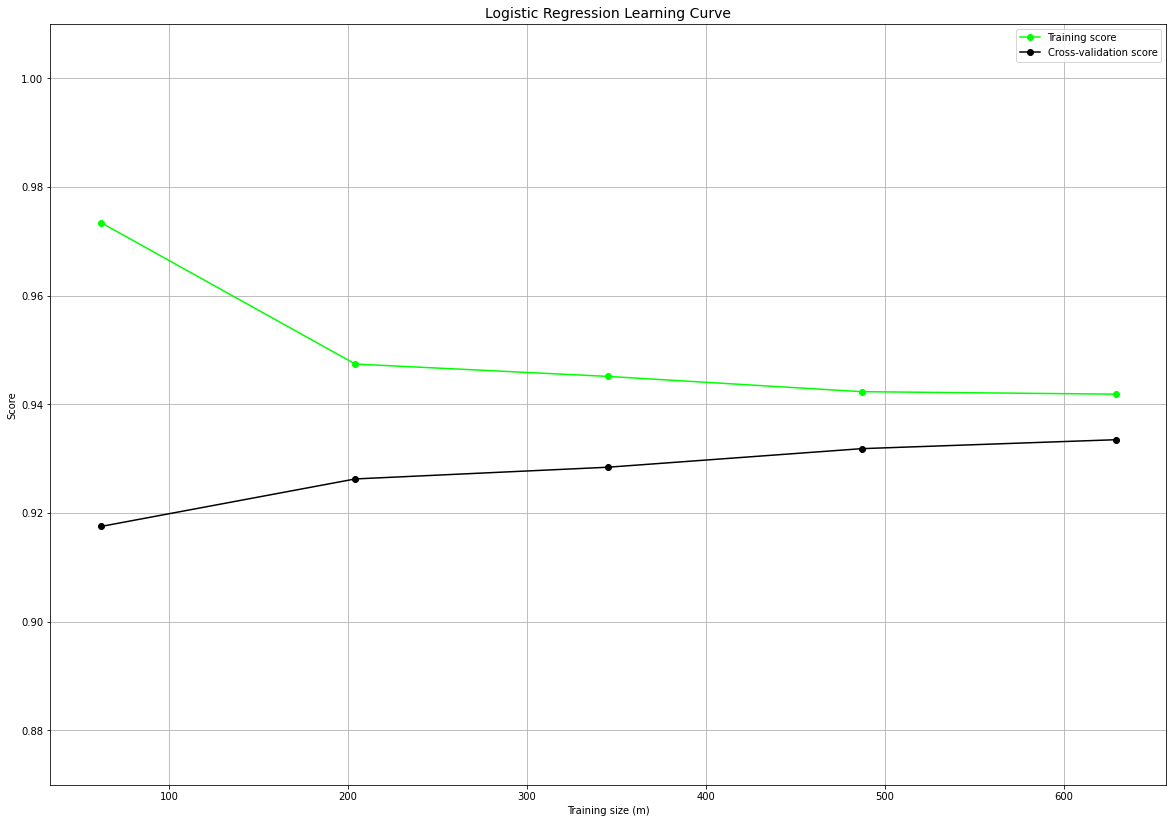

In [120]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(lr_be, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=1)